## Import Data

In [1]:
import os
import pandas as pd
import numpy as np
import scipy as sp
import warnings
warnings.filterwarnings('ignore')

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")


## Exploratory Analysis

Quick look at the data

In [2]:
print (train.head(10))
print (train.shape)

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   
5   6          50       RL         85.0    14115   Pave   NaN      IR1   
6   7          20       RL         75.0    10084   Pave   NaN      Reg   
7   8          60       RL          NaN    10382   Pave   NaN      IR1   
8   9          50       RM         51.0     6120   Pave   NaN      Reg   
9  10         190       RL         50.0     7420   Pave   NaN      Reg   

  LandContour Utilities    ...     PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN    NaN         NaN       0   
1         Lvl    AllPub

Look at the data types. Object has the highest count.

train.dtypes.value_counts()

Density plots for numeric features:

Some interesting facts: 
* most homes were built in year 2000
* most homes have about 1000 sqft for the 1st floor
* most homes sold for under $200,000

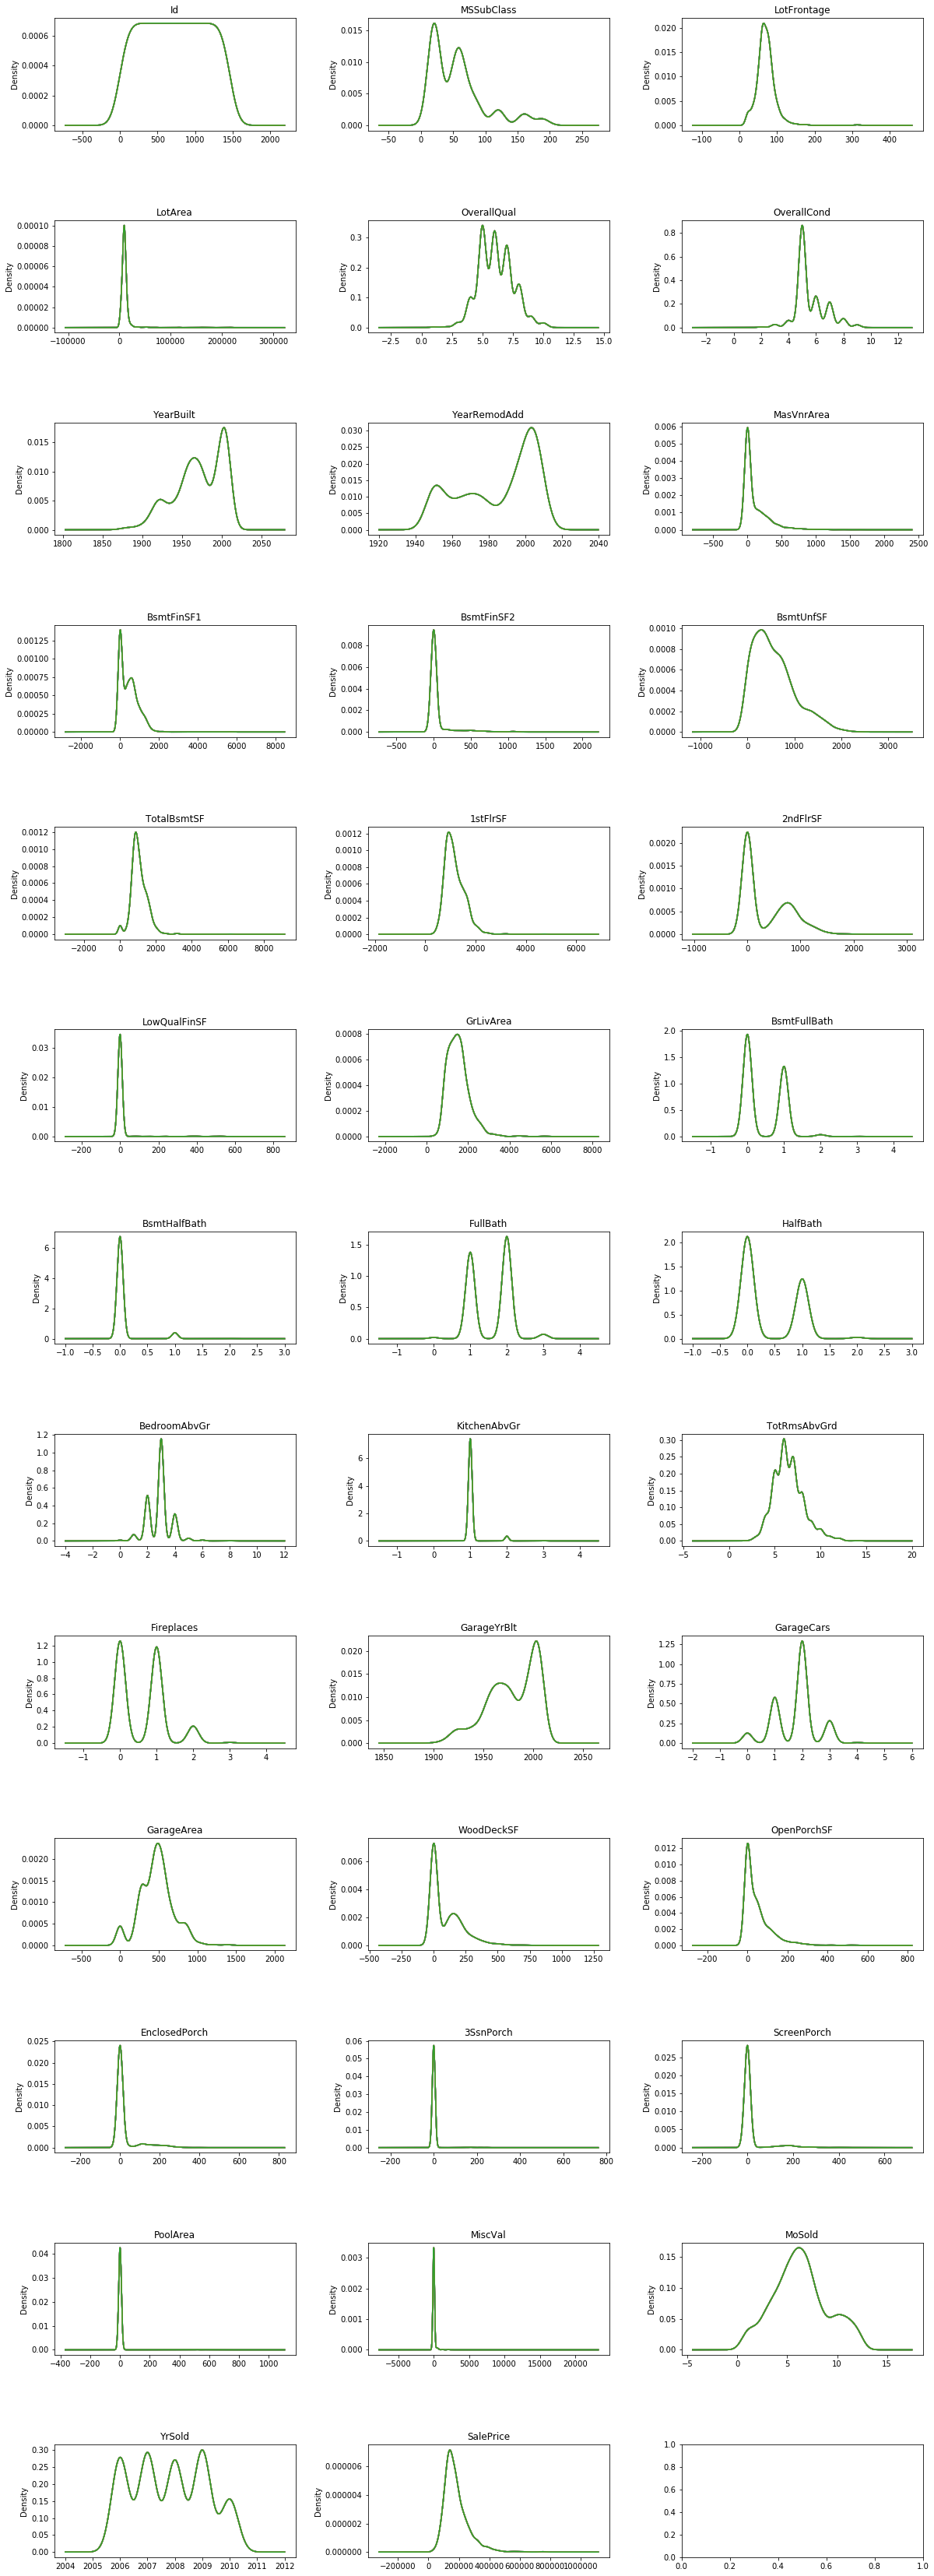

In [5]:


import matplotlib.pyplot as plt
%matplotlib inline

train.select_dtypes(include=['float64','int64'])
# num_features = train.dtypes[train.dtypes in ['int64','float64']].index
n_features1 = 10
n_rows = 13
num_df = train.select_dtypes(include=['float64','int64'])

fig, axs = plt.subplots(n_rows,3, figsize = (20,60))

fig.subplots_adjust(hspace=.8, wspace=.3)

for k in axs:
    for i,j in zip(num_df, axs.flat):
        g = num_df[i].plot.kde(ax = j, title = i)
        g.get_xaxis().tick_bottom()
        g.get_yaxis().tick_left()

Bar Plots for categorical features:

Some interesting facts:

* Most Homes are in North Ames
* The ones with garage are attached to the house
* Most are normal sales

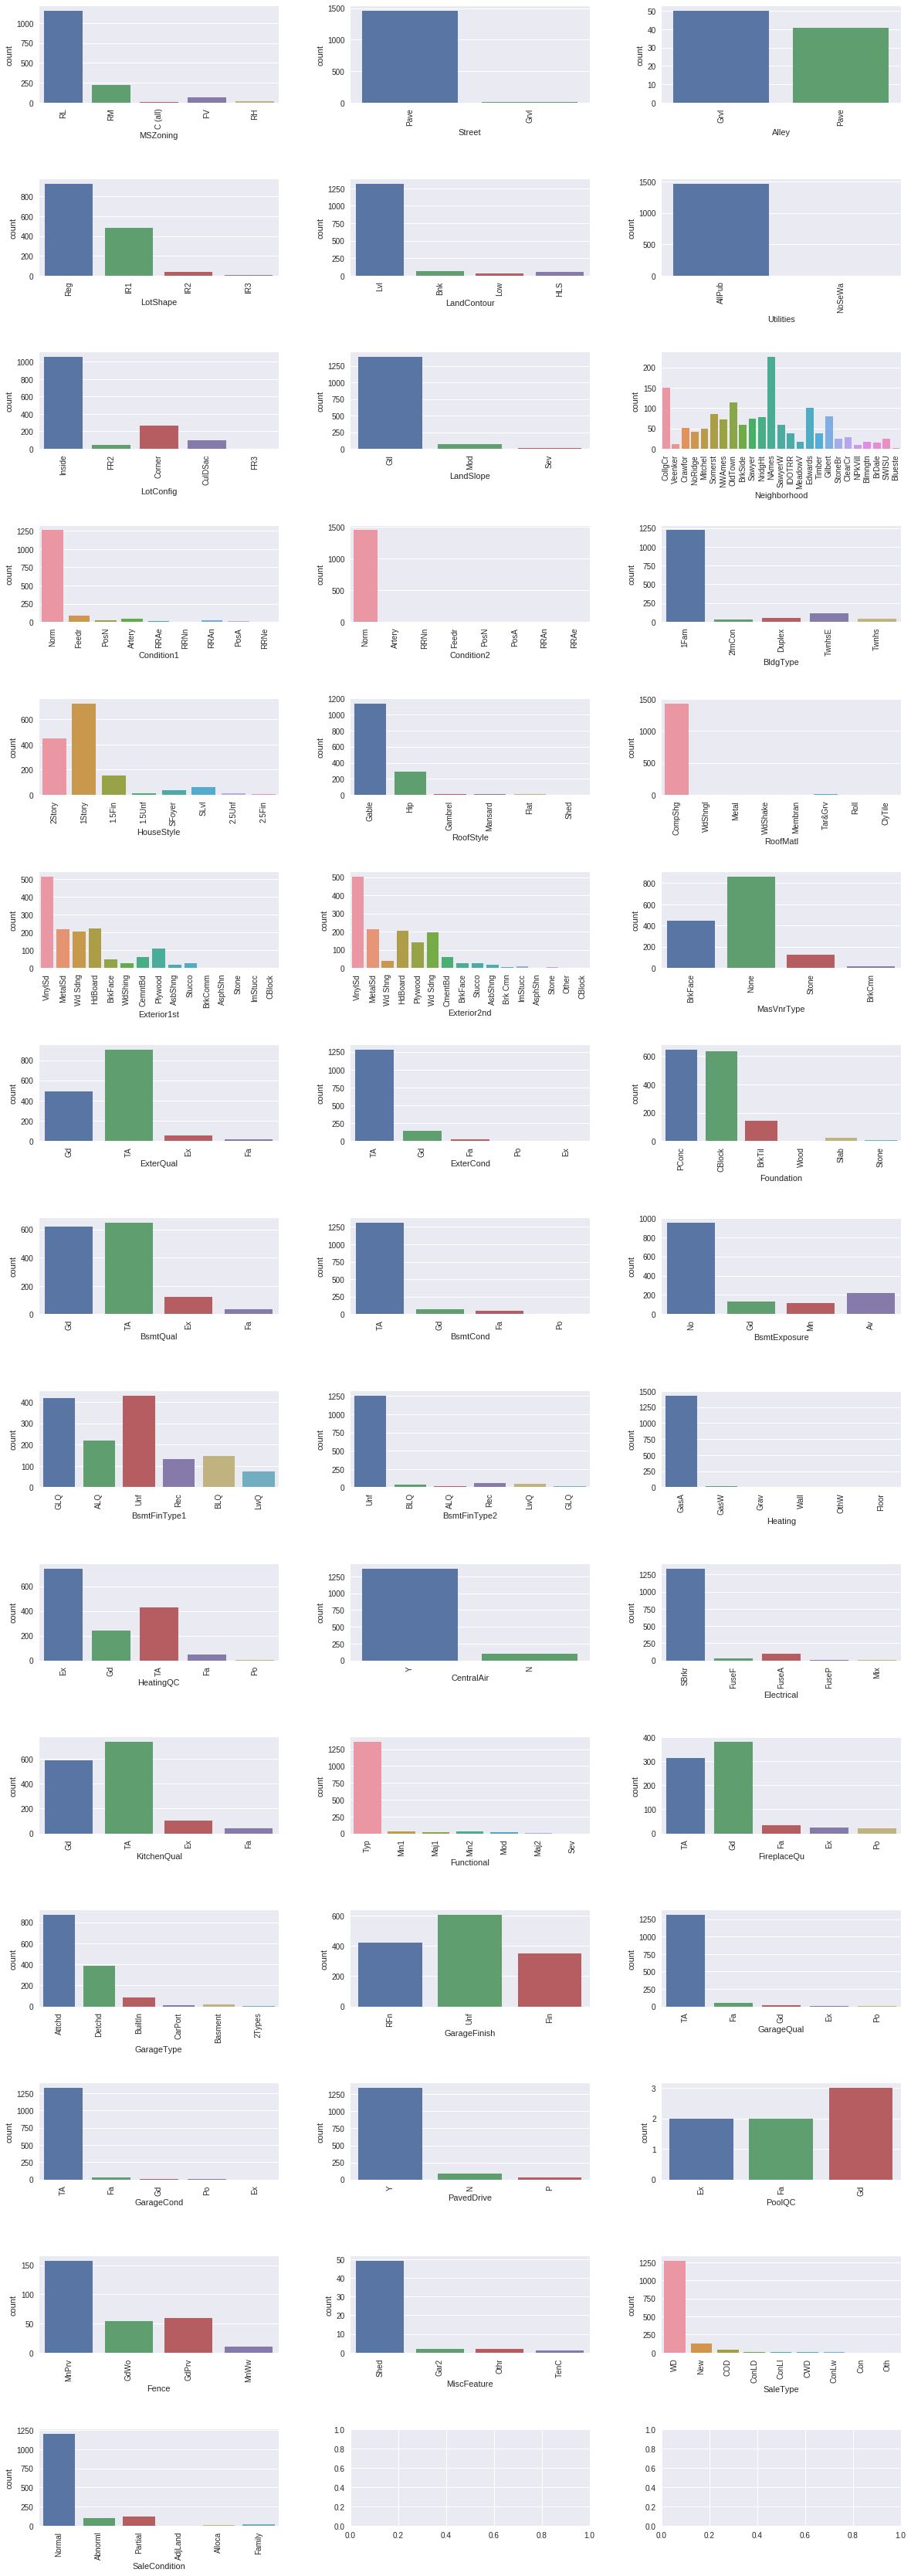

In [6]:
import seaborn as sns
#object features
object_features = train.dtypes[train.dtypes == 'object'].index
n_features1 = 10
n_rows = 15
object_df = train[object_features]

fig, axs = plt.subplots(n_rows,3, figsize = (20,60))

fig.subplots_adjust(hspace=.8, wspace=.3)


for k in axs:
    for i,j in zip(object_features, axs.flat):
        g = sns.countplot(x=i, data=object_df, ax=j)
        plt.setp(j.get_xticklabels(), rotation=90)

The pearson correlation of each numeric feature has with the target (SalePrice). OverallQual has the highest correlation with .79 and BsmtFinSF2 has lowest with 0.011.

In [8]:
numeric_features = train.dtypes[train.dtypes != 'object'].index
pearson = train[numeric_features].corr(method='pearson')
corr_with_target = pearson.ix[-1][1:-1]
corr_with_target = corr_with_target[abs(corr_with_target).argsort()[::-1]]
print (corr_with_target)

OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
ScreenPorch      0.111447
PoolArea         0.092404
MSSubClass      -0.084284
OverallCond     -0.077856
MoSold           0.046432
3SsnPorch        0.044584
YrSold          -0.028923
LowQualFinSF    -0.025606
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
Name: SalePrice, dtype: float64


The Spearmen correlation of each numeric feature with the target (Sale Price). OverallQual has highest and MSSubClass has the lowest

In [9]:
numeric_features = train.dtypes[train.dtypes != 'object'].index
spearman = train[numeric_features].corr(method='spearman')
corr_with_target = spearman.ix[-1][1:-1]
corr_with_target = corr_with_target[abs(corr_with_target).argsort()[::-1]]
print (corr_with_target)

OverallQual      0.809829
GrLivArea        0.731310
GarageCars       0.690711
YearBuilt        0.652682
GarageArea       0.649379
FullBath         0.635957
TotalBsmtSF      0.602725
GarageYrBlt      0.593788
1stFlrSF         0.575408
YearRemodAdd     0.571159
TotRmsAbvGrd     0.532586
Fireplaces       0.519247
OpenPorchSF      0.477561
LotArea          0.456461
MasVnrArea       0.421309
LotFrontage      0.409076
WoodDeckSF       0.353802
HalfBath         0.343008
BsmtFinSF1       0.301871
2ndFlrSF         0.293598
BedroomAbvGr     0.234907
BsmtFullBath     0.225125
EnclosedPorch   -0.218394
BsmtUnfSF        0.185197
KitchenAbvGr    -0.164826
OverallCond     -0.129325
ScreenPorch      0.100070
MoSold           0.069432
LowQualFinSF    -0.067719
3SsnPorch        0.065440
MiscVal         -0.062727
PoolArea         0.058453
BsmtFinSF2      -0.038806
YrSold          -0.029899
BsmtHalfBath    -0.012189
MSSubClass       0.007192
Name: SalePrice, dtype: float64


Let's check the correlation between each feature. There are some features that have high correlation:
* TotalBsmtSF and 1stFlrSF have .82 correlation
* YearBuilt and GarageYrBlt have .83 correlation
* GrLivArea and TotRmsAbvGrd have .83 correlation
* GarageCars and GarageArea have .88 correlation
* BsmtFinSF2 and BsmtUntSF have -.5 correlation highest negative


In [25]:
train.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


## Data Cleaning

Begin with removing features that have multi-collinearity. Out of the 4 pairs, remove 1 from each pair.

In [26]:
mc_columns = ['TotalBsmtSF', 'GarageYrBlt','TotRmsAbvGrd','GarageCars']
train.drop(mc_columns, axis = 1, inplace = True)
test.drop(mc_columns, axis = 1, inplace = True)



The following counts the nulls in each feature for train and test set. There are some features with greater than 90% null.

In [31]:
# columns with NAs and count
print ("Train Columns with Nulls \n")
train_nulls = []
for column in train.columns:
    if train[column].isnull().sum() > 0:
        print ("Column: %s has %d nulls which is %s%%" \
        %(column, train[column].isnull().sum(), round(train[column].isnull().sum()/len(train),2)*100))
        train_nulls.append(column)
        
#test
test_nulls = []
print ("\nTest Columns with Nulls \n")
for column in test.columns:
    if test[column].isnull().sum() > 0:
        print ("Column: %s has %d nulls which is %s%%" \
        %(column, test[column].isnull().sum(), round(test[column].isnull().sum()/len(test),2)*100.0))
        test_nulls.append(column)

Train Columns with Nulls 

Column: LotFrontage has 259 nulls which is 18.0%
Column: Alley has 1369 nulls which is 94.0%
Column: MasVnrType has 8 nulls which is 1.0%
Column: MasVnrArea has 8 nulls which is 1.0%
Column: BsmtQual has 37 nulls which is 3.0%
Column: BsmtCond has 37 nulls which is 3.0%
Column: BsmtExposure has 38 nulls which is 3.0%
Column: BsmtFinType1 has 37 nulls which is 3.0%
Column: BsmtFinType2 has 38 nulls which is 3.0%
Column: Electrical has 1 nulls which is 0.0%
Column: FireplaceQu has 690 nulls which is 47.0%
Column: GarageType has 81 nulls which is 6.0%
Column: GarageFinish has 81 nulls which is 6.0%
Column: GarageQual has 81 nulls which is 6.0%
Column: GarageCond has 81 nulls which is 6.0%
Column: PoolQC has 1453 nulls which is 100.0%
Column: Fence has 1179 nulls which is 81.0%
Column: MiscFeature has 1406 nulls which is 96.0%

Test Columns with Nulls 

Column: MSZoning has 4 nulls which is 0.0%
Column: LotFrontage has 227 nulls which is 16.0%
Column: Alley has 1

Let's narrow the columns down to at least 70% nulls. The train columns are equal to test columns. The percentages are about the same. Alley, PoolQC, Fence, and MiscFeature have a high percentage of nulls which means there is a lot of missing data. It is probably ok to drop these columns.

In [33]:
limit = .70
#train
train_nulls_less_70 = []
train_remove = []
print ("Train Columns with Nulls > 70%\n")
for column in train_nulls:
    if float(train[column].isnull().sum()/len(train)) > limit:
        print ("Column: %s has %d nulls which is %s%%" \
        %(column, train[column].isnull().sum(), round(train[column].isnull().sum()/len(train),2)*100))
        train_remove.append(column)
    else:
        train_nulls_less_70.append(column)
        
#test
test_nulls_less_70 = []
test_remove = []
print ("\nTest Columns with Nulls > 70%\n")
for column in test_nulls:
    if float(test[column].isnull().sum()/len(test)) > limit:
        print ("Column: %s has %d nulls which is %s%%" \
        %(column, test[column].isnull().sum(), round(test[column].isnull().sum()/len(test),2)*100.0))
        test_remove.append(column)
    else:
        test_nulls_less_70.append(column)

Train Columns with Nulls > 70%

Column: Alley has 1369 nulls which is 94.0%
Column: PoolQC has 1453 nulls which is 100.0%
Column: Fence has 1179 nulls which is 81.0%
Column: MiscFeature has 1406 nulls which is 96.0%

Test Columns with Nulls > 70%

Column: Alley has 1352 nulls which is 93.0%
Column: PoolQC has 1456 nulls which is 100.0%
Column: Fence has 1169 nulls which is 80.0%
Column: MiscFeature has 1408 nulls which is 97.0%


In [34]:
train.drop(train_remove, axis = 1, inplace = True)
test.drop(test_remove, axis = 1, inplace = True)



Here we impute the nulls. There were categorical features that had a category "None" so we assume the nulls were suppose to be "None" or 0 if numeric. Electrical is true null because it does not have the category "None". A true null is when the value is truly unknown and cannot be assumed (more about this later). We create a list of true null columns to be imputed later on.


In [36]:
print (train_nulls_less_70)
#Electrical null is not part of factors
train_columns_true_null = {'Electrical':['Utilities','YearBuilt','Heating','HeatingQC','CentralAir']}
train_columns_null = [item for item in train_nulls_less_70 if item not in train_columns_true_null.keys()]

['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']


Impute Nulls in Train set

In [37]:
for column in train_columns_null:
    if train[column].dtype == 'float64':
        train.ix[train[column].isnull(), column] = 0
    else:
        train.ix[train[column].isnull(), column] = 'None'

Let's find the test features that are true nulls and regular nulls. There are 6 true null features which we will deal with later.

In [38]:
print (test_nulls_less_70)
#null not part of factors
test_columns_true_null = {'MSZoning':['LotShape','LandContour','LandSlope','Neighborhood'],
                          'Utilities':['YearBuilt','Heating','HeatingQC','CentralAir'],
                          'Exterior1st':['RoofStyle','MasVnrType','Foundation'],
                          'Exterior2nd':['RoofStyle','MasVnrType','Foundation'],
                          'KitchenQual':['OverallQual','OverallCond','Functional'],
                          'Functional':['KitchenQual','OverallQual','OverallCond']}
test_columns_null = [item for item in test_nulls_less_70 if item not in test_columns_true_null.keys()]
#SaleType (change to Other)

['MSZoning', 'LotFrontage', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageArea', 'GarageQual', 'GarageCond', 'SaleType']


In [39]:
# replace the test null columns
for column in test_columns_null:
    if test[column].dtype == 'float64':
        test.ix[test[column].isnull(), column] = 0
    elif column == 'SaleType':
        test.ix[test[column].isnull(), column] = 'Oth'
    else:
        test.ix[test[column].isnull(), column] = 'None'


### Find True Nulls and Replace

The function below replaces the nulls values that are not part of the column's categories. For example Electrical has the following categories:

* SBrkr    Standard Circuit Breakers & Romex
* FuseA    Fuse Box over 60 AMP and all Romex wiring (Average)    
* FuseF    60 AMP Fuse Box and mostly Romex wiring (Fair)
* FuseP    60 AMP Fuse Box and mostly knob & tube wiring (poor)
* Mix    Mixed

a regular null will be just be a missing data point. We will find columns relevant to the null value's column in question. We will take the values for the relevant columns associated with the null value and find existing observations with the same values. If they are match I will record it and in the end take the value with the most occurences and set the null value as it.


In [40]:
def find_nulls_and_similar_then_replace(df, null_column, rel_columns):
    #try to find similar obsverations like null MSZoning
    null_values = df[df[null_column].isnull()]\
    [rel_columns].values

    num_nulls = len(null_values) #number of nulls
    num_rel_columns = len(rel_columns) #number of relevant columns

    not_null_values = df[df[null_column].notnull()]\
    [rel_columns]

    similar_values = {sec : [] for sec in range(0,num_nulls)}#index of similar no null values to null values

    for key, values in enumerate(null_values):
        for index, row in not_null_values.iterrows(): #iterate over all rows
            if (row.values == values).sum() >= (num_rel_columns - 1): #if greater than equal to num_rel_columns - 1 
                similar_values[key].append(df.ix[index,null_column]) #append to list

    replace_nulls(df, null_column, similar_values)

In [42]:
from collections import Counter

def replace_nulls(df, column, similar_values):
    
    most_common_value = []
    
    for key in similar_values:
        most_common_value.append(Counter(similar_values[key]).most_common(1)[0][0]) #most common value is appended to list

    df.ix[df[column].isnull(),column] = most_common_value #replace nulls

Apply find_nulls_and_similar_then_replace on train set.

In [44]:
#Train
for key, value in train_columns_true_null.items():
    find_nulls_and_similar_then_replace(train,key,value)

Apply find_nulls_and_similar_then_replace on train set.

In [46]:
#Test
for key, value in test_columns_true_null.items():
    find_nulls_and_similar_then_replace(test,key,value)

A check to see if it worked

In [48]:
print (train.isnull().values.any())
print (test.isnull().values.any())

False
False


Reassigning the features and response variable, and checking if train features equal test features.

In [49]:
#reset the x y variables
train_x = train.ix[:,:-1]
train_y = train.ix[:,-1]

train_x.columns == test.columns #check columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True], dtype=bool)

Here we check if the categorical features have the same categories in the train and test set. It looks like there are a bunch of features that do not have the same set of categories. That's ok we will only take the ones that match when the features are converted to dummy variables.

In [51]:
# check if objects have the same number of categories
train_objects = train.dtypes[train.dtypes=='object'].index
test_objects = test.dtypes[test.dtypes=='object'].index

print (train_objects == test_objects)
for column in train_objects:
    if len(train[column].unique()) != len(test[column].unique()):
        print (column, train[column].unique(), test[column].unique())

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True]
Utilities ['AllPub' 'NoSeWa'] ['AllPub']
Condition2 ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe'] ['Norm' 'Feedr' 'PosA' 'PosN' 'Artery']
HouseStyle ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin'] ['1Story' '2Story' 'SLvl' '1.5Fin' 'SFoyer' '2.5Unf' '1.5Unf']
RoofMatl ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll' 'ClyTile'] ['CompShg' 'Tar&Grv' 'WdShake' 'WdShngl']
Exterior1st ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock'] ['VinylSd' 'Wd Sdng' 'HdBoard' 'Plywood' 'MetalSd' 'CemntBd' 'WdShing'
 'BrkFace' 'AsbShng' 'BrkComm' 'Stucco' 'AsphShn' 'CBlock']
Exterior2nd ['VinylSd' 'MetalSd' 'Wd Shng

## Machine Learning

We begin the machine learning part by transforming the categorical features into dummy variables.

In [52]:
def dummy_transform(df):
    # create dummy columns 
    object_columns = df.columns[df.dtypes == 'object']
    #print object_columns.shape
    object_dummies = pd.get_dummies(df[object_columns], drop_first = False)
    #print object_dummies.shape
    
    # new dataframe 
    new_train_x = pd.concat([df, object_dummies], axis=1)
    nonobject_columns = new_train_x.columns[new_train_x.dtypes != "object"]
    #print nonobject_columns.shape
    nonobject_columns = nonobject_columns[1:] # removed id
    new_train_x = new_train_x[nonobject_columns]
    
    return(new_train_x)

This function will find the dummy variables with the same names in both train and test.

In [53]:
# Dummy columns after test transformation, find columns that are the same in both sets
def train_test_same_columns(train_df,test_df):
    test = dummy_transform(test_df) #dummy
    train = dummy_transform(train_df) #dummy

    final_columns = test.columns & train.columns #only columns that match
    
    return train[final_columns],test[final_columns]

Now we run it and my number of train features equals number of test features

In [54]:
train_x_dum, test_dum = train_test_same_columns(train_x,test)

RMSE is the metric we will be using to measure error.

In [55]:
from sklearn.metrics import mean_squared_error as mse
def error_metric(y_true,y_pred):
    
    error = np.sqrt(mse(y_true,y_pred))
    
    return error


Split the train data into train and test.

In [56]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(train_x_dum, train_y, test_size=0.20, random_state=0) #split set

/home/ironstark/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [59]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

In [65]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'mean_squared_error'
# Spot-Check Algorithms
models = []
models.append(( ' LR ' , LinearRegression()))
models.append(( ' LASSO ' , Lasso()))
models.append(( ' EN ' , ElasticNet()))
models.append(( ' KNN ' , KNeighborsRegressor()))
models.append(( ' CART ' , DecisionTreeRegressor()))
models.append(( ' SVR ' , SVR()))
# evaluate each model in turn
results = []
names = []
warnings.filterwarnings('ignore')
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

 LR : -745944225.501364 (320730763.602529)
 LASSO : -767566422.193379 (338094576.005702)
 EN : -942407784.527766 (550377742.346281)
 KNN : -2266089386.249348 (766701250.098392)
 CART : -2154929871.110315 (1116885971.487471)
 SVR : -6488997031.072951 (1337654760.625490)


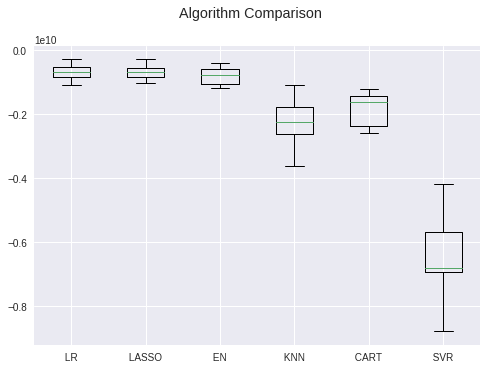

In [66]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle( ' Algorithm Comparison ' )
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()